# 2. Pandas Time Series

Pandas has special features for handling time series data:
- DatetimeIndex
- Time resampling
- Time shifts
- Rolling and expanding
- Bollinger bands

## 2.1 DateTime Index = Datetime objects in Index

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# weird way od loading it, but it is so!
from datetime import datetime

In [4]:
my_year = 2017
my_month = 1
my_day = 2
my_hour = 13
my_minute = 30
my_second = 15

In [5]:
my_date = datetime(my_year, my_month, my_day)

In [6]:
# y, m, d, h, m, s
# if values not enetered, defaulted to 0
my_date

datetime.datetime(2017, 1, 2, 0, 0)

In [7]:
my_date = datetime(my_year, my_month, my_day, my_hour, my_minute, my_second)

In [8]:
my_date

datetime.datetime(2017, 1, 2, 13, 30, 15)

In [9]:
type(my_date)

datetime.datetime

In [12]:
# datetime.datetime is a data strcuture from which we can extract attributes
# like day, year, etc.
my_date.year

2017

In [13]:
my_date.month

1

In [14]:
# We can create a list of datetime objects
# and then convert it to an index of datetimes: DatetimeIndex
# It is very common to have indices of type DatetimeIndex
# and we can do special operations with them
first_two = [datetime(2016,1,1),datetime(2016,1,2)]

In [20]:
# We have a list of datetimes
first_two

[datetime.datetime(2016, 1, 1, 0, 0), datetime.datetime(2016, 1, 2, 0, 0)]

In [19]:
type(first_two)

list

In [16]:
# We now convert our list of datetimes
# to a DatetimeIndex
dt_ind = pd.DatetimeIndex(first_two)

In [17]:
dt_ind

DatetimeIndex(['2016-01-01', '2016-01-02'], dtype='datetime64[ns]', freq=None)

In [21]:
# We attach some random data to it
# and assemble a dataframe
data = np.random.rand(2,2)
data

array([[0.85901581, 0.5847485 ],
       [0.36105178, 0.65967892]])

In [22]:
cols = ['a', 'b']

In [23]:
df = pd.DataFrame(data,dt_ind,cols)

In [24]:
df

,a,b
2016-01-01,0.859016,0.584749
2016-01-02,0.361052,0.659679


In [26]:
# Index with max value? Location of max date.
df.index.argmax()

1

In [27]:
# Max value among indices? Max date.
df.index.max()

Timestamp('2016-01-02 00:00:00')

## 2.2 Time Resampling = GroupBy for Dates

We usually get data that has a DateTime Index on a smaller time scale (every day, every hour, etc.), but we want to aggregate to every month/quarter, etc.

Instead of working with `groupby`, we can use some resampling tools, which are more useful for time data. `resample` is basically like a layer over `groupby`; with it, we group periods of entries according to an offsetting/frequency rule (eg., yearly, quarterly, etc.), and then a function is applied on the perdiods: `mean`, `max`, ..., or a custom lambda/function.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
df = pd.read_csv('data/walmart_stock.csv')

In [30]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [32]:
# When we check .info() we see that
# the date is a string (object) -> it needs to be converted to datetime!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Volume     1258 non-null   int64  
 6   Adj Close  1258 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [33]:
# Convert strings of dates to datetime
# In our case we have the standard formatting already
# but if we had another format, we could address it with the format argument
# look docu (shift+TAB):
# %d/%m/%Y, %d/%m/%y, ...
df['Date'] = pd.to_datetime(df['Date'])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   Open       1258 non-null   float64       
 2   High       1258 non-null   float64       
 3   Low        1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Volume     1258 non-null   int64         
 6   Adj Close  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [36]:
# We usually set the date as index
df.set_index('Date',inplace=True)

In [37]:
# Another option is to set the index when reading
# and letting the automatic date parser try its best.
# This works when dates are in a regular format
df = pd.read_csv('data/walmart_stock.csv', index_col='Date', parse_dates=True)

In [38]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [40]:
df.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [42]:
# For datetime resampling we need a datetime index
# When we resample, data rows are grouped according to a rule frequency/offset
# After grouping, a function can be applied, eg: mean, max, or a custom lambda/function
# Offset/Frequency rule aliases can be found here:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
# Examples
# A, Y: year end frequency
# Q: quarterly
df.resample(rule='A').mean()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,67.158680,67.602120,66.786520,67.215120,9.239015e+06,59.389349
2013-12-31,75.264048,75.729405,74.843055,75.320516,6.951496e+06,68.147179
2014-12-31,77.274524,77.740040,76.864405,77.327381,6.515612e+06,71.709712
2015-12-31,72.569405,73.064167,72.034802,72.491111,9.040769e+06,68.831426
2016-12-31,69.481349,70.019643,69.023492,69.547063,9.371645e+06,68.054229


In [44]:
# Max values for each quarter
df.resample(rule='Q').max()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-03-31,62.400002,62.630001,61.910000,62.480000,28630200,54.494442
2012-06-30,68.940002,69.720001,68.559998,69.720001,38007300,61.631517
2012-09-30,74.959999,75.239998,74.449997,75.139999,17813200,66.781948
2012-12-31,77.599998,77.599998,76.690002,77.150002,23401900,68.568371
2013-03-31,74.930000,75.110001,74.430000,74.849998,25683700,67.324929
2013-06-30,79.230003,79.959999,78.900002,79.860001,14564500,72.262093
2013-09-30,78.680000,79.000000,78.430000,78.769997,14972300,71.275793
2013-12-31,81.209999,81.370003,80.820000,81.209999,10633700,73.929868
2014-03-31,78.860001,79.470001,78.519997,78.910004,17160200,72.254228


In [45]:
# Custom function: first day values of the grouped entries,
# eg, first instance of the period
def first_day(entry):
    return entry[0]

In [46]:
df.resample('A').apply(first_day)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2013-12-31,68.930000,69.239998,68.449997,69.239998,10390800,61.879708
2014-12-31,78.720001,79.470001,78.500000,78.910004,6878000,72.254228
2015-12-31,86.269997,86.720001,85.550003,85.900002,4501800,80.624861
2016-12-31,60.500000,61.490002,60.360001,61.459999,11989200,59.289713


<AxesSubplot:xlabel='Date'>

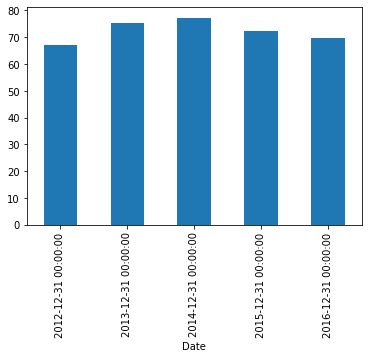

In [48]:
# Example application: Yearly end mean
# We get the mean of each period ending every year end
df['Close'].resample('A').mean().plot(kind='bar')

<AxesSubplot:xlabel='Date'>

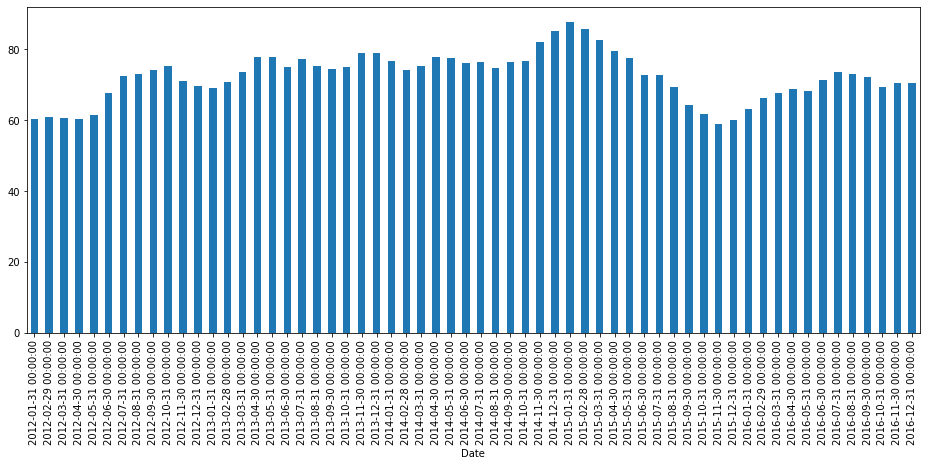

In [49]:
# Monthly mean close prices
df['Close'].resample('M').mean().plot(kind='bar',figsize=(16,6))

## 2.3 Time Shifts

Sometimes we want to shift our data back or forwards in time; we use `shift` for that.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
# Load CSV
# Parse dates and set them to be index
df = pd.read_csv('data/walmart_stock.csv', index_col='Date', parse_dates=True)

In [54]:
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [56]:
# If we want to shift all data one day forward: periods=1
# First row becomes NaN, second row gets the values of the first, last row values are lost
df.shift(periods=1).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,59.970001,61.060001,59.869999,60.330002,12668800.0,52.619235
2012-01-05,60.209999,60.349998,59.470001,59.709999,9593300.0,52.078475
2012-01-06,59.349998,59.619999,58.369999,59.419998,12768200.0,51.825539
2012-01-09,59.419998,59.450001,58.869999,59.000000,8069400.0,51.459220


In [58]:
# Shift one day back
df.shift(periods=-1).tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-23,69.300003,69.820000,69.250000,69.699997,4435700.0,69.191240
2016-12-27,69.940002,70.000000,69.260002,69.309998,4875700.0,68.804087
2016-12-28,69.209999,69.519997,69.120003,69.260002,4298400.0,68.754456
2016-12-29,69.120003,69.430000,68.830002,69.120003,6889500.0,68.615479
2016-12-30,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
# freq assigns the selected datetime to the index values
# for instance: make all days of a month have the last day as index
df.shift(freq='M').head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-31,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-31,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-31,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-31,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [63]:
# all entries have their end-of-year index value
df.shift(freq='A').head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-12-31,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-12-31,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-12-31,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-12-31,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


## 2.4 Pandas Rolling (= Moving Averages) and Expanding 

Rolling Mean = Moving Average. The rolling mean is often used to remove noise.

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
# Load CSV
# Parse dates and set them to be index
df = pd.read_csv('data/walmart_stock.csv', index_col='Date', parse_dates=True)

<AxesSubplot:xlabel='Date'>

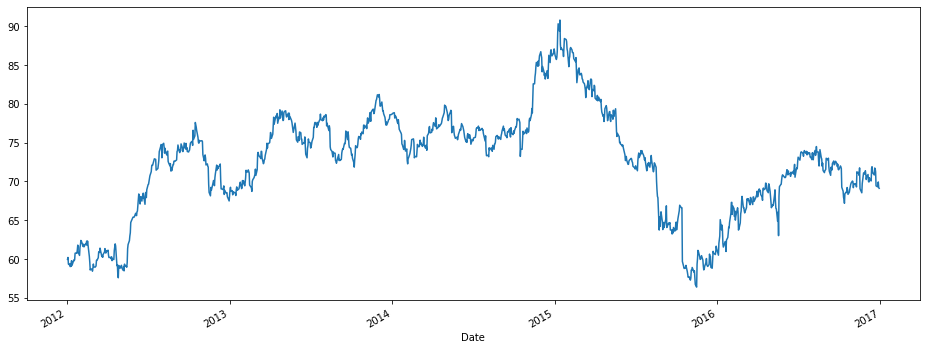

In [66]:
# We see the data is quite noise
df['Open'].plot(figsize=(16,6))

In [69]:
# We can smooth the data or remove noise averaging by week
# window: entries to group (days)
# we need to use an aggregate function: mean(), max(), etc.
# in our example, first 7 days are NaN, because no 7-day MA can be computed for them
df.rolling(window=7).mean().head(14)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,59.495714,59.895714,59.074285,59.440000,9.007414e+06,51.842984
2012-01-12,59.469999,59.744285,59.007143,59.321429,8.231357e+06,51.739567
2012-01-13,59.322857,59.638571,58.941428,59.297143,7.965071e+06,51.718386


<AxesSubplot:xlabel='Date'>

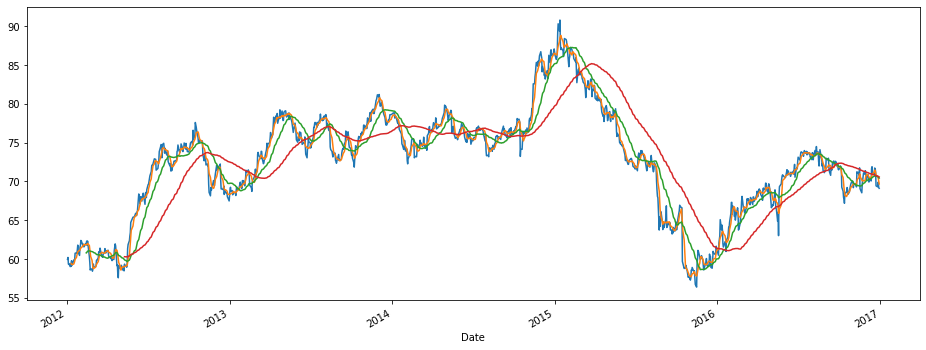

In [74]:
# Compare both original and rolled/moving-averaged data in a plot
df['Open'].plot(figsize=(16,6))
df.rolling(window=7).mean()['Close'].plot()
df.rolling(window=30).mean()['Close'].plot()
df.rolling(window=90).mean()['Close'].plot()

<AxesSubplot:xlabel='Date'>

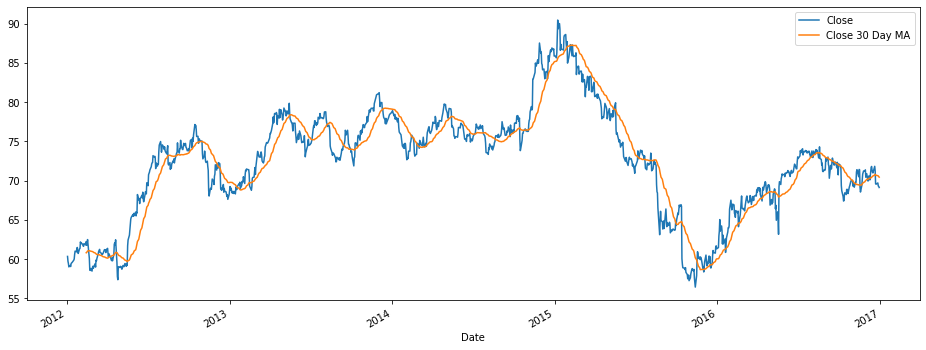

In [76]:
# If we want to have a legend, we can create new columns
df['Close 30 Day MA'] = df.rolling(window=30).mean()['Close']
df[['Close','Close 30 Day MA']].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

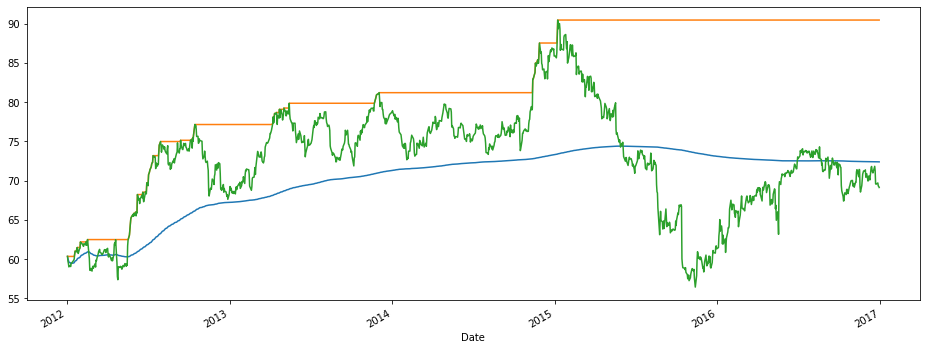

In [81]:
# Expanding: each datapoint is a function of the complete history to till that point
# The function can be chosen: min, max, mean, etc.
# With these plots, we can see major trends
df['Close'].expanding().mean().plot(figsize=(16,6))
df['Close'].expanding().max().plot(figsize=(16,6))
df['Close'].plot(figsize=(16,6))

## 2.5 Bollinger Bands

Volatility is measured with the standard ddeviation of a series. Bollinger bands are volatily bands placed below and above the moving average of a series. The bands widen when the volatility increases and narrow the volatility decreases. Bollinger bands are often used as expected tops and bottoms. Bollinger bands are typically used with 20-day moving averages (I guess because 20 work days are month and stock/security exchanges close at weekends). We can use the bands to determine how big are price movements.

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
# Load CSV
# Parse dates and set them to be index
df = pd.read_csv('data/walmart_stock.csv', index_col='Date', parse_dates=True)

In [85]:
# Close 20-Day MA
df['Close: 20-Day Mean'] = df['Close'].rolling(20).mean()
# Upper band = 20MA + 2*std(20-day)
df['Upper'] = df['Close: 20-Day Mean'] + 2*df['Close'].rolling(20).std()
# Lower band = 20MA - 2*std(20-day)
df['Lower'] = df['Close: 20-Day Mean'] - 2*df['Close'].rolling(20).std()

<AxesSubplot:xlabel='Date'>

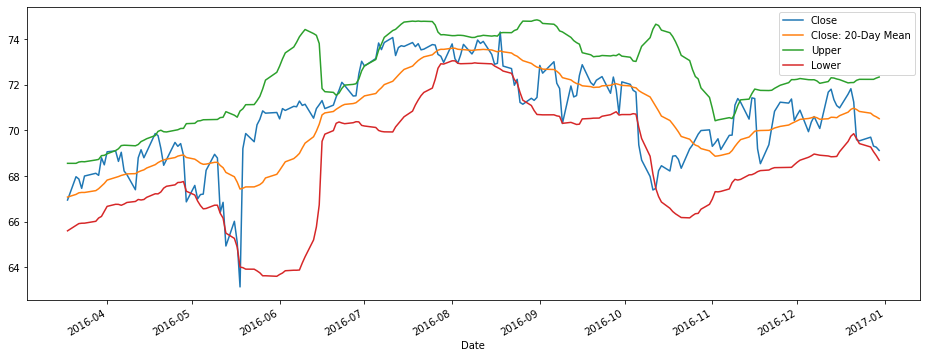

In [87]:
# Plot everything: original, MA, Bollinger bands
df[['Close','Close: 20-Day Mean','Upper','Lower']].tail(200).plot(figsize=(16,6))